## Lecture 3: Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [1]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


Text(0, 0.5, 'Heart Rate')

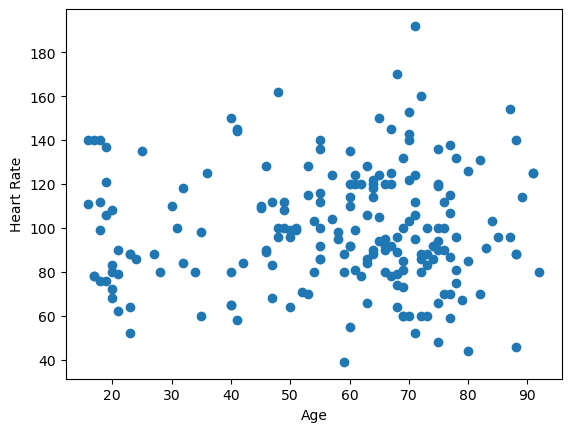

In [8]:
# Example 1: 
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df["Age"], df["HeartRate"])
plt.xlabel("Age")
plt.ylabel("Heart Rate")

Text(0, 0.5, 'HeartRate')

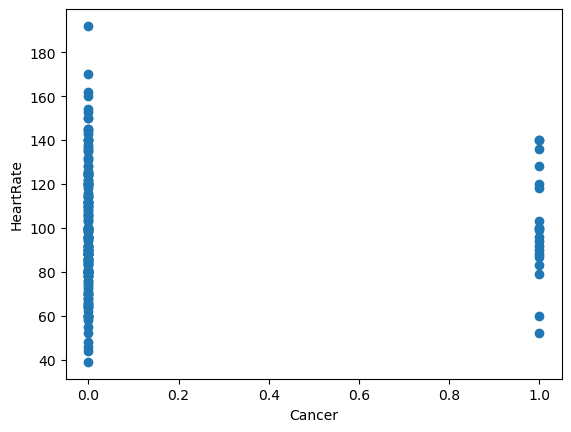

In [24]:
# Example 2: 
plt.scatter(df["Cancer"], df["HeartRate"])
plt.xlabel("Cancer")
plt.ylabel("HeartRate")

Text(0, 0.5, 'Count')

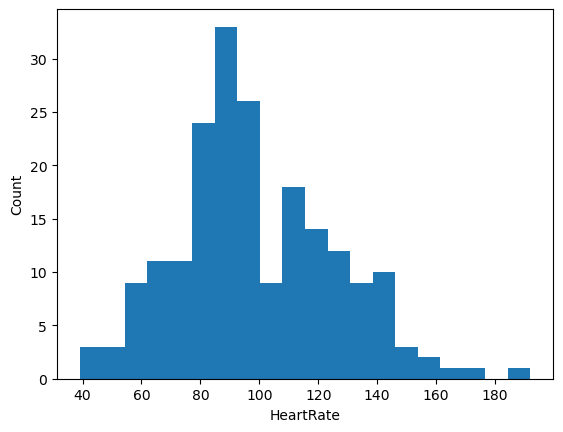

In [23]:
# Example 3: 
plt.hist(df["HeartRate"], bins = 20)
plt.xlabel("HeartRate")
plt.ylabel("Count")

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot 

#### One categorical: bar plot

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

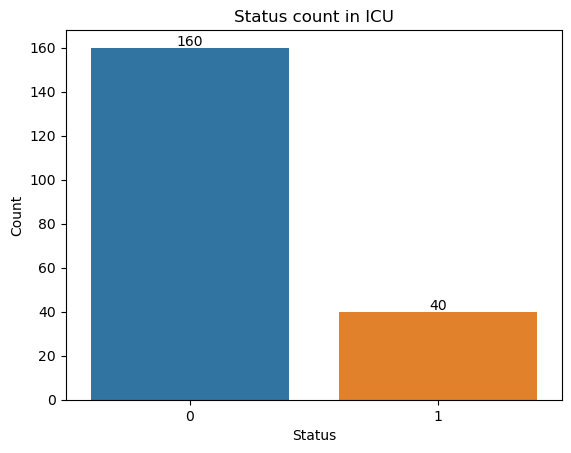

In [29]:
sns.countplot(x = "Status", data = df)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Status count in ICU")

status_counts = df["Status"].value_counts()

# create count label for each bar
for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha = "center")


plt.show()

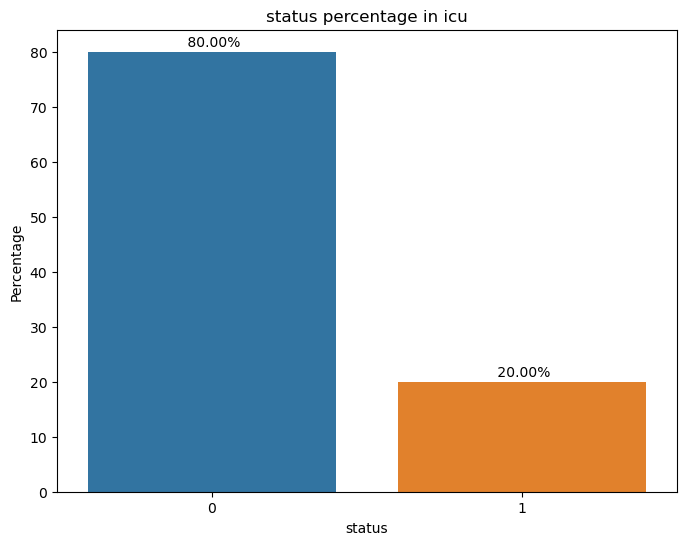

In [34]:
status_counts = df["Status"].value_counts(normalize = True) * 100

plt.figure(figsize = (8, 6))
sns.barplot(x = status_counts.index, y = status_counts.values)



plt.xlabel("status")
plt.ylabel("Percentage")
plt.title("status percentage in icu")

# create percent count label for each bar
for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value: .2f}%', ha = "center")
plt.show()

##### What to write about a bar plot

- what is the figure about?
- percentage/count for each group
- whether there is a clear difference


the figure is about the number of poeple survived in the ICU admission. status 0 means the patient has survived in the ICU while status 1 means the patient died in the ICU. Among the 200 patients in the data, 40 patients (20%) died. It seems that ther is a difference between the two groups.


#### One continous: histogram/density plot/boxplot

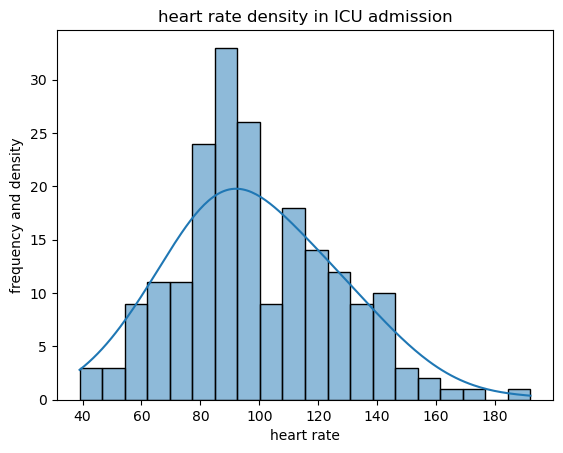

In [40]:
# histogram: example 1

sns.histplot(df["HeartRate"], kde = True, bins = 20, kde_kws = {'bw_method':0.6})

plt.xlabel("heart rate")
plt.ylabel("frequency and density")
plt.title("heart rate density in ICU admission")

plt.show()

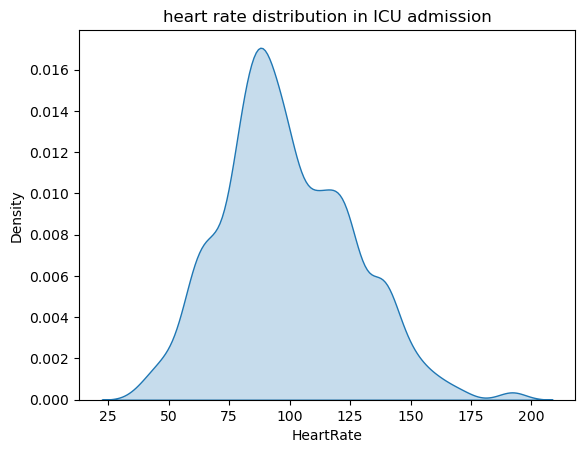

In [39]:
# density plot
sns.kdeplot(df["HeartRate"], fill = True, bw_adjust=0.6)
plt.title("heart rate distribution in ICU admission")

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


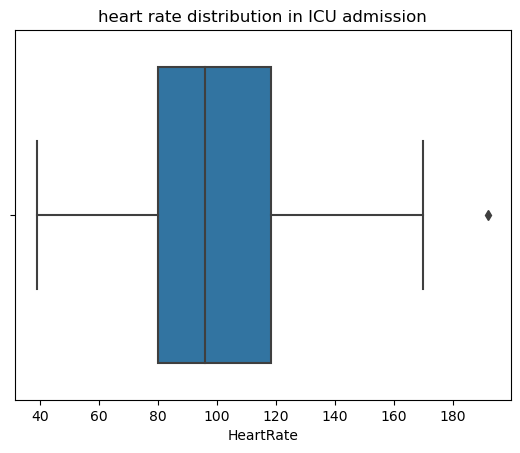

In [41]:
# box plot
sns.boxplot(df["HeartRate"])
plt.title("heart rate distribution in ICU admission")

plt.show()

##### Difference between histogram/density plot/ boxplot

- histogram and density plot emphasize distribution of the data
- boxplot emphpasize statistics of the data (Mediam, IQR)
- boxplot cannot catch distribution information, ex. bi mode
- histogram needs to choose the bin number and the density plot needs to choose the bandwidth
-

##### Difference between histogram and bar plot

- histogram is for the numeric data (numbers have meaning) and bar plot is for categorical data (could just be unique variables)
- histogram for most of the case is vertical but the bar plot can be horizontal
- bar plot can switch the order, but histogram is on a numerical scale, so order matters.


##### What to write about a histogram/density plot

- shape (skewness and mode)
- majority of the data (typical value: mean 
- potential outlier

<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">


in the figure, the heart rate has a uni-model distribution which is slightly skewed to the right (positively skewed). The typical value is within the range 98.9 \pm 26.8 = [72.1 - 125.7]. There might be a large positive outlier

##### What to write about a box plot

- still want to comment on the skewness but not the shape
- majority of the data (IQR)
- potential outliers

in the figure, the heart rate has a distribution slightly skewed to the right. The IQR range is from 80 to 118.25. There might exist an outlier with a large positive value

#### Two continous: scatter plot

Text(0.5, 1.0, 'Age vs heart rate')

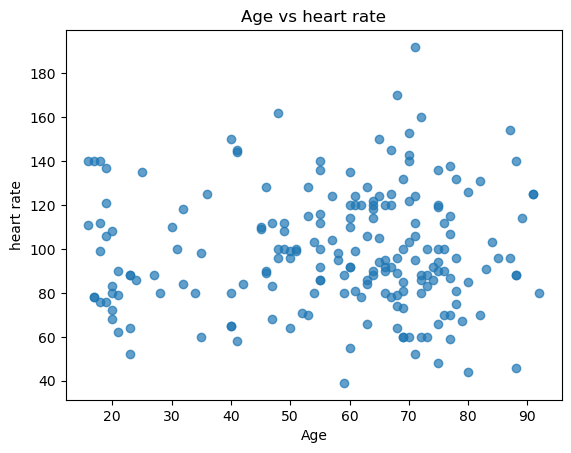

In [43]:
plt.scatter(df["Age"], df["HeartRate"], alpha = 0.7)

plt.xlabel("Age")
plt.ylabel("heart rate")
plt.title("Age vs heart rate")

##### What to write about a scatter plot

- trend (linear or nonlinear)
- any outliers
- any clusters

In the figure, there is no clear trend in the relation between age and heart rate. There is no points that are far away from the others, and no pattern for clustering.


#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

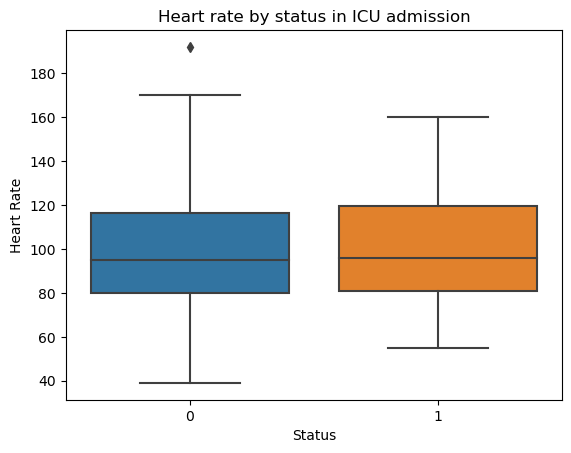

In [44]:
sns.boxplot(x = "Status", y = "HeartRate", data = df)

plt.xlabel("Status")
plt.ylabel("Heart Rate")
plt.title("Heart rate by status in ICU admission")

plt.show()

##### What to write about a side-by-side boxplot or density plot

- highlight the comparison
- for the boxplot, declare whether the boxes are overlaped/ same values.

In the figure, the boxplot is overlapped, which means there is no practical differences between the heart rate across survive group and non-survived group. 


#### Two categorical: side-by-side bar plot

Text(0.5, 1.0, 'Side-by-Side bar plot for CPR and Status')

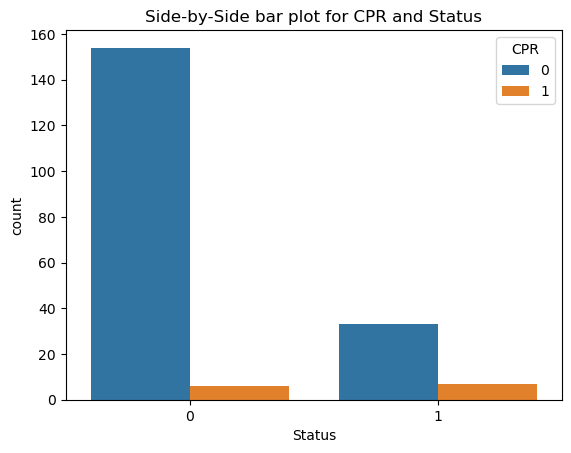

In [45]:
sns.countplot(x = "Status", hue = "CPR", data = df)

plt.title("Side-by-Side bar plot for CPR and Status")

##### What to write about a side-by-side bar plot

- highlight the comparison


In the figure, the distribution of CPR use is different for the sruvival group and non-survival group. In the survival group, there are much larger proportion/count of patients who do not use CPR, compared to the non-survival group, whcih means that there might exist relation between whether CPR use and the survival or not.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [46]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


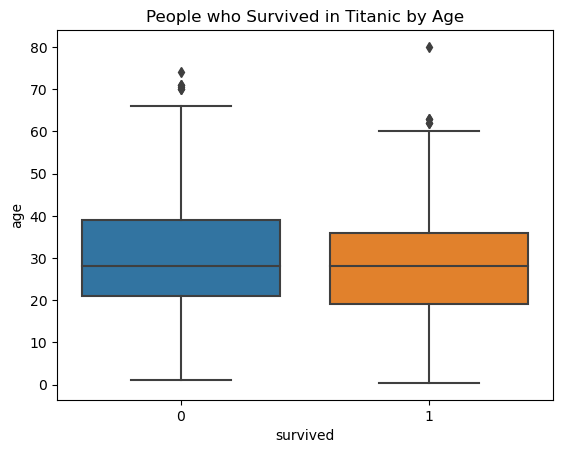

In [55]:
sns.boxplot(x = "survived", y = "age", data = titanic_data)


plt.title("People who Survived in Titanic by Age")

plt.show()

Text(0.5, 1.0, 'Side-by-Side bar plot for survived and sex')

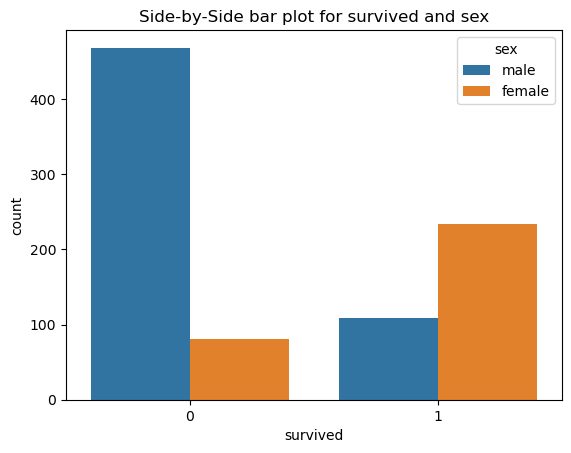

In [57]:
sns.countplot(x = "survived", hue = "sex", data = titanic_data)

plt.title("Side-by-Side bar plot for survived and sex")

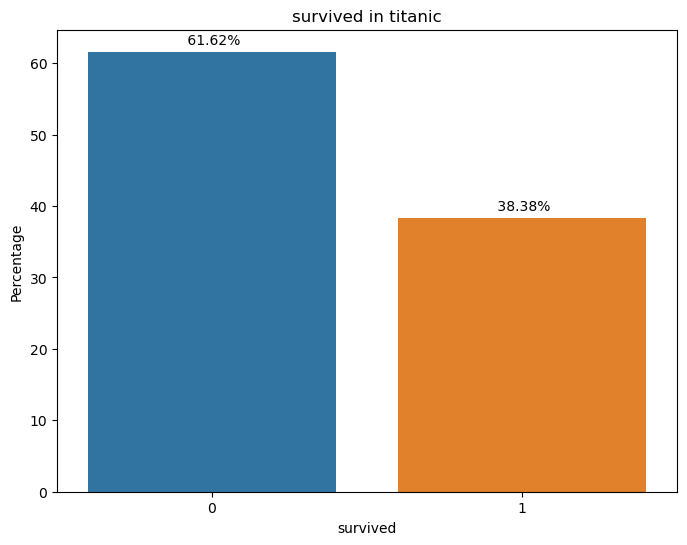

In [58]:
status_counts = titanic_data["survived"].value_counts(normalize = True) * 100

plt.figure(figsize = (8, 6))
sns.barplot(x = status_counts.index, y = status_counts.values)



plt.xlabel("survived")
plt.ylabel("Percentage")
plt.title("survived in titanic")

# create percent count label for each bar
for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value: .2f}%', ha = "center")
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?

In [ ]:
Another option that I want to have for my plots would 